This notebook investigates the student population given incoming attributes

# Preparing the data
We need to load pre survey (incoming attitudes), post survey (demographics data), and worksheet (incoming knowledge).

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is converted to HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
%load_ext autoreload
%autoreload 1
%aimport utils_read_parsing
%aimport utils_timeline_viz
from utils_timeline_viz import *
from utils_read_parsing import *
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ranksums
import seaborn as sns
import statsmodels.api as sm
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.discrete.discrete_model import Logit
from sklearn import decomposition
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 10, 6
pd.set_option('precision',3)
pd.set_option("display.width", 100)
np.set_printoptions(precision=3,suppress=True)

## Grabbing the worksheet data

In [3]:
%reload_ext utils_read_parsing
pre_survey_df = get_massaged_pre_survey()
post_survey_df = get_massaged_post_survey()
worksheet_df = get_massaged_worksheet_model_data()

In [4]:
# data = worksheet_df.copy()
# data = data.merge(pre_survey_df, how='outer', on=['sid']);
post_survey_df = post_survey_df[['age','english.0-writing','english.1-reading','gender-Gender non conforming/non-binary','gender-Man','gender-Prefer not to answer','gender-Woman','major','year-1st year undergraduate','year-2nd year undergraduate','year-3rd year undergraduate','year-4th year undergraduate','sim','sim_index','sid']]
post_survey_df.fillna(0,inplace=True)
post_survey_df = post_survey_df[post_survey_df['sim_index']==2]
data = pre_survey_df.merge(post_survey_df, how='outer', on=['sid']);

In [5]:
# %reload_ext utils_read_parsing
# #grab worksheet data - beers
# worksheets = get_worksheet_metadata('beers')
# pre_b = get_pre_worksheet(sim='beers')

# ids = get_students_to_analyze_log_worksheets('beers')
# pre_b = pre_b[pre_b['Student ID'].isin(worksheets[(worksheets['Type']=='p')&worksheets['Student ID'].isin(ids)]['other id'].values)]

# #ids in pre/post match "other id" in worksheet metdata so we need to assign the correct id in logs for each entry in pre/post
# pre_b['sid'] = pre_b['Student ID'].apply(lambda row: worksheets.loc[worksheets[(worksheets['other id']==row)].index[0],'Student ID'])

# #grab worksheet data - caps
# worksheets = get_worksheet_metadata('caps')
# pre_c = get_pre_worksheet(sim='caps')

# ids = get_students_to_analyze_log_worksheets('caps')
# pre_c= pre_c[pre_c['Student ID'].isin(worksheets[(worksheets['Type']=='p')&worksheets['Student ID'].isin(ids)]['other id'].values)]

# #ids in pre/post match "other id" in worksheet metdata so we need to assign the correct id in logs for each entry in pre/post
# pre_c['sid'] = pre_c['Student ID'].apply(lambda row: worksheets.loc[worksheets[(worksheets['other id']==row)].index[0],'Student ID'])

# pre_b.index = pre_b['sid']
# pre_c.index = pre_c['sid']
# pre_b.drop(['Student ID','sid'],axis=1,inplace=True)
# pre_c.drop(['Student ID','sid'],axis=1,inplace=True)

## Grabbing survey data

In [6]:
# ## Run the notebook "data_log_to_pre_post_surveys_connector" to create this file
# pre_survey_df = pd.read_csv('pre_survey_results.txt', sep='\t')
# pre_survey_df.index = pre_survey_df['sid']
# pre_survey_df.drop(['Unnamed: 0','sid'],inplace=True,axis=1)
# pre_survey_df.head()

In [7]:
# ## Run the notebook "data_log_to_pre_post_surveys_connector" to create this file
# post_survey_df = pd.read_csv('post_survey_results.txt', sep='\t')
# post_survey_df = post_survey_df[['age','english.0-writing','english.1-reading','gender-Gender non conforming/non-binary','gender-Man','gender-Prefer not to answer','gender-Woman','major','year-1st year undergraduate','year-2nd year undergraduate','year-3rd year undergraduate','year-4th year undergraduate','sim','sim_index','sid']]
# post_survey_df.index = post_survey_df['sid']
# post_survey_df.fillna(0,inplace=True)
# post_survey_df = post_survey_df[post_survey_df['sim_index']==2]
# post_survey_df.drop(['sid'],axis=1,inplace=True)
# post_survey_df.head()

## Putting it together

In [8]:
# data = pd.concat([pre_b,pre_c,post_survey_df,pre_survey_df],axis=1)
# data.rename(columns={"sim": "second sim"},inplace=True)
# data.drop('sim_index',axis=1,inplace=True)
# data.reset_index(inplace=True)

In [9]:
data.sort_values('sid').head(12)

,[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs],similar_L,similar_C,same_L,same_C,prior_number_virtual_labs,perceivedvalue.0-boring,...,gender-Man,gender-Prefer not to answer,gender-Woman,major,year-1st year undergraduate,year-2nd year undergraduate,year-3rd year undergraduate,year-4th year undergraduate,sim,sim_index
94,1.0,1.0,1.0,NaN,0,0,0,0,1,Mostly,...,0.0,0.0,1.0,*Undeclared,1.0,0.0,0.0,0.0,C,2
61,1.0,NaN,1.0,NaN,0,0,0,0,1,Somewhat,...,0.0,0.0,1.0,*Undeclared,1.0,0.0,0.0,0.0,L,2
64,1.0,1.0,1.0,NaN,1,0,0,0,1,Not at all,...,0.0,0.0,1.0,*Undeclared,1.0,0.0,0.0,0.0,C,2
15,1.0,1.0,1.0,NaN,0,0,0,0,2,Somewhat,...,0.0,0.0,1.0,General Science,1.0,0.0,0.0,0.0,L,2
62,NaN,1.0,1.0,NaN,0,0,0,0,3,Somewhat,...,1.0,0.0,0.0,*Undeclared,1.0,0.0,0.0,0.0,L,2
128,1.0,NaN,1.0,NaN,1,0,1,0,1,Mostly,...,0.0,0.0,1.0,*Undeclared,1.0,0.0,0.0,0.0,L,2
34,1.0,1.0,NaN,NaN,0,0,0,0,2,Not at all,...,0.0,0.0,1.0,Computer Science,0.0,0.0,1.0,0.0,L,2
99,1.0,1.0,1.0,NaN,0,0,0,0,2,Not at all,...,0.0,0.0,1.0,Integrated Sciences,0.0,1.0,0.0,0.0,L,2
51,1.0,NaN,NaN,NaN,0,0,0,0,0,Not at all,...,1.0,0.0,0.0,*Undeclared,1.0,0.0,0.0,0.0,L,2
52,1.0,1.0,1.0,NaN,1,0,0,0,2,Not at all,...,0.0,0.0,1.0,*Undeclared,1.0,0.0,0.0,0.0,C,2


## Convert lickert scale and other values from strings to integers

In [10]:
value_converter2 = {
    'Prefer not to answer':0,
    '20-22':21,
    '18-19':19,
    '17 and under':17,
    'Fluent':3,
    'Average':2,
    'Beginner':1,
    'Absorbance':2,
    'Capacitance':1,
    'Not at all':1,
    'Definitely':4,
    'Somewhat':2,
    'Mostly':3,
    'Almost always':4,
    'Sometimes':2,
    'Almost never':1,
    'Often':3,
}

In [11]:
for value,replacement in value_converter2.iteritems():
    data = data.replace(value,replacement)
data.fillna(0,inplace=True)
data.head()

,[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs],similar_L,similar_C,same_L,same_C,prior_number_virtual_labs,perceivedvalue.0-boring,...,gender-Man,gender-Prefer not to answer,gender-Woman,major,year-1st year undergraduate,year-2nd year undergraduate,year-3rd year undergraduate,year-4th year undergraduate,sim,sim_index
0,1.0,1.0,1.0,0.0,0,0,0,0,2,3.0,...,0.0,0.0,1.0,*Non science or applied science major,1.0,0.0,0.0,0.0,C,2
1,1.0,1.0,0.0,0.0,0,0,0,0,0,2.0,...,1.0,0.0,0.0,Civil Engineering,1.0,0.0,0.0,0.0,L,2
2,0.0,1.0,1.0,0.0,0,0,0,0,1,1.0,...,0.0,0.0,1.0,*Undeclared,0.0,1.0,0.0,0.0,C,2
3,1.0,1.0,1.0,0.0,0,1,0,0,3,2.0,...,1.0,0.0,0.0,Engineering Physics,1.0,0.0,0.0,0.0,L,2
4,0.0,1.0,0.0,0.0,1,0,0,0,2,2.0,...,1.0,0.0,0.0,Mechanical Engineering,1.0,0.0,0.0,0.0,C,2


In [12]:
for c in data.columns:
    if data[c].dtype not in ['int64','float64']:
        print c, data[c].dtype
#     else:
#         print c

major object
sim object


In [13]:
data.drop('major',axis=1,inplace=True)

In [14]:
demo_columns = ["age","english.0-writing","english.1-reading","gender-Gender non conforming/non-binary","gender-Man","gender-Prefer not to answer","gender-Woman","year-1st year undergraduate","year-2nd year undergraduate","year-3rd year undergraduate","year-4th year undergraduate","second sim","[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory]","[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory]","[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory]","[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs]","similar_L","similar_C","same_L","same_C","prior_number_virtual_labs"]
att_columns = ["perceivedvalue.0-boring","perceivedvalue.1-productive","perceivedvalue.2-useless","perceivedvalue.3-engaging","taskinterpretation.0-investigate the basic mechanics of the topic at hand","taskinterpretation.1-design my own experiments that can help me understand the topic at hand","taskinterpretation.2-memorize information about the topic at hand","taskinterpretation.3-complete a certain number of  questions","taskinterpretation.4-develop scientific reasoning skills","pocc.0-learning the basic concepts","pocc.1-testing my ideas and theories","pocc.2-answering given questions","pocc.3-memorizing key information","pocc.4-exploring the topic"]
pv_columns = ["perceivedvalue.0-boring","perceivedvalue.1-productive","perceivedvalue.2-useless","perceivedvalue.3-engaging"]
ti_columns = ["taskinterpretation.0-investigate the basic mechanics of the topic at hand","taskinterpretation.1-design my own experiments that can help me understand the topic at hand","taskinterpretation.2-memorize information about the topic at hand","taskinterpretation.3-complete a certain number of  questions","taskinterpretation.4-develop scientific reasoning skills"]
pocc_columns = ["pocc.0-learning the basic concepts","pocc.1-testing my ideas and theories","pocc.2-answering given questions","pocc.3-memorizing key information","pocc.4-exploring the topic"]
know_columns = ['Concentration','Wavelength','Width','Area','Separation','Battery voltage']

# Analysis of incoming attributes

In [15]:
N = len(set(data['sid']))
print "The study includes {0} students.".format(N)

The study includes 148 students.


## What are their incoming attitudes?

### Descriptives

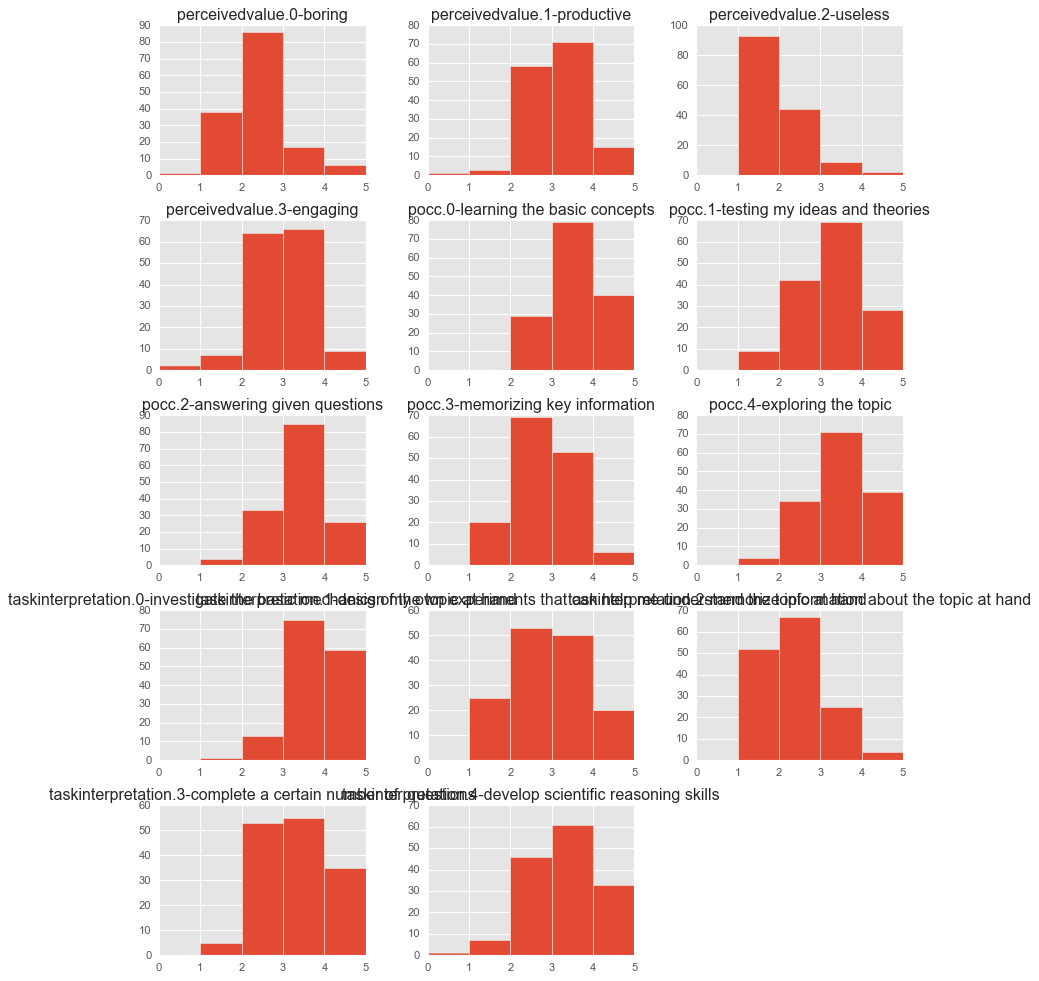

In [16]:
data[att_columns].hist(figsize=(12,15),layout=(len(att_columns)/3+1,3),bins=[0,1,2,3,4,5]);

Clearly, many attitude questions are related. Let's investigate how much:

### Relationship between attitude measures

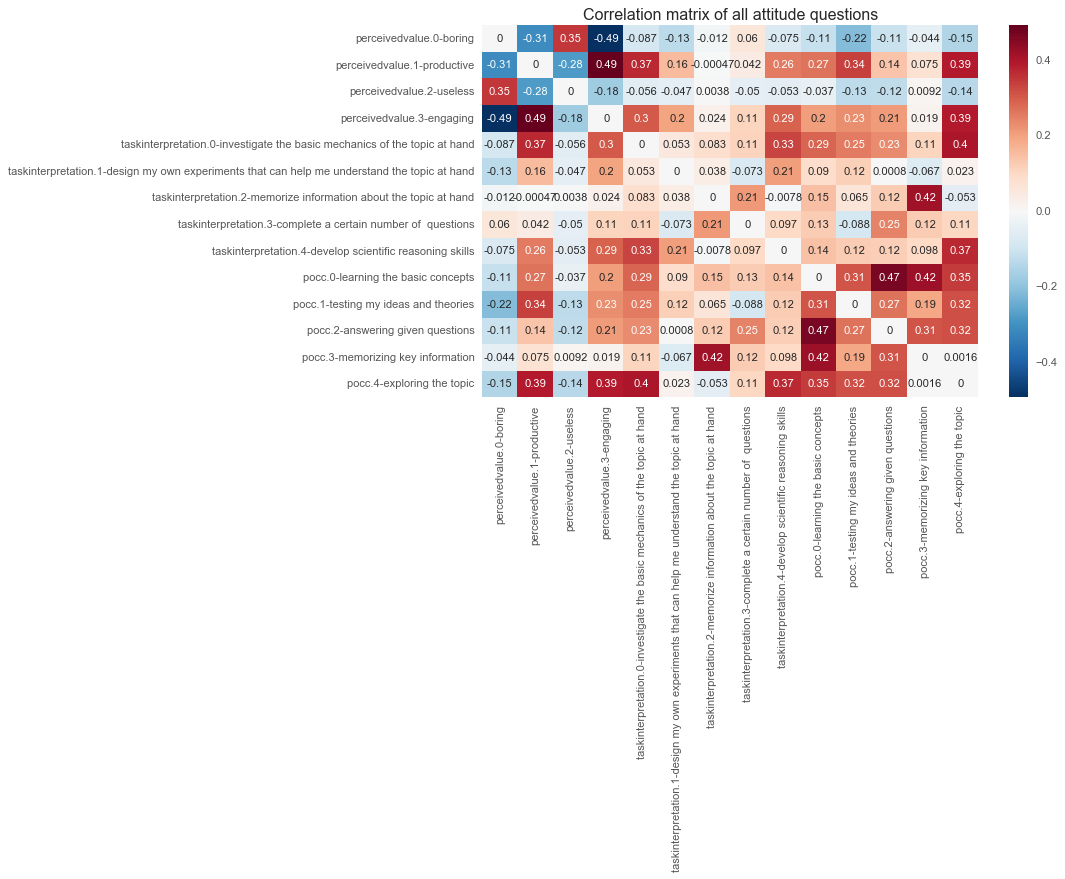

In [17]:
from scipy.stats import spearmanr
correlation_matrix = np.zeros((len(att_columns),len(att_columns)))
for i,att_i in enumerate(att_columns):
    for j,att_j in enumerate(att_columns):
        r,p = spearmanr(data[att_i],data[att_j])
        correlation_matrix[i,j] = r

np.fill_diagonal(correlation_matrix,0)
plt.title("Correlation matrix of all attitude questions")
sns.heatmap(correlation_matrix,yticklabels=att_columns,xticklabels=att_columns,annot=True);

All the POCC type questions are highly correlated between each other (0.3,0.4).
All the perveiced value questions are also highly correlated or anti-correlated (0.3,0.4) which is great since they were deisgned that way ("Do you think the activity will be productive/useless, boring/engaging"). What is interesting is that if they find it productive they also find it engaging.

### Reliability scores of attitude questions

To get good reliability measures, we need to reverse some questions values with negative correlations to everything else

In [18]:
data['perceivedvalue.0-boring_reversed'] = 4-data['perceivedvalue.0-boring']
data['perceivedvalue.2-useless_reversed'] = 4-data['perceivedvalue.2-useless']
pv_fixed_columns = ["perceivedvalue.0-boring_reversed","perceivedvalue.1-productive","perceivedvalue.2-useless_reversed","perceivedvalue.3-engaging"]

In [19]:
def cronbach_alpha(scores):
    if scores.isnull().values.any():
        print "Cannot compute Cronbach alpha: your dataframe has NaN values."
        return
    K = scores.shape[1]
    sum_of_var = float(scores.apply(lambda x: np.var(x,ddof=1), axis=0).sum())
    var = float(np.var(scores.sum(axis=1),ddof=1))
    alpha = (K/float(K-1.0))*(1.0-sum_of_var/var)
    return round(alpha,2)

In [20]:
t = [['questions combined','reliability score']]
t.append(['all (14)',cronbach_alpha(data[att_columns]) ])
t.append(['POCC (5)',cronbach_alpha(data[att_columns]) ])
t.append(['Perceived value (4)',cronbach_alpha(data[pv_fixed_columns]) ])
t.append(['Task interpretation (5)',cronbach_alpha(data[ti_columns]) ])
t.append(['Task interpretation and perceived value (9)',cronbach_alpha(data[ti_columns+pv_fixed_columns]) ])

print tabulate(t)

-------------------------------------------  -----------------
questions combined                           reliability score
all (14)                                     0.61
POCC (5)                                     0.61
Perceived value (4)                          0.66
Task interpretation (5)                      0.33
Task interpretation and perceived value (9)  0.57
-------------------------------------------  -----------------


### What are the principle factors of all attitude questions? (PCA)

In [21]:
columns_for_pc = att_columns
pca = decomposition.PCA(n_components=6)
pca.fit(data[columns_for_pc])
pca.explained_variance_ratio_.cumsum()

array([ 0.23 ,  0.366,  0.463,  0.555,  0.639,  0.702])

The first three components of the PCA exaplined almost 50% of the data. Let's stick to 2 to simplify our analysis

In [22]:
NC = 2
pca = decomposition.PCA(n_components=NC)
pca.fit(data[columns_for_pc])
X = pca.transform(data[columns_for_pc])
data['PC1'] = zip(*X)[0]
data['PC2'] = zip(*X)[1]

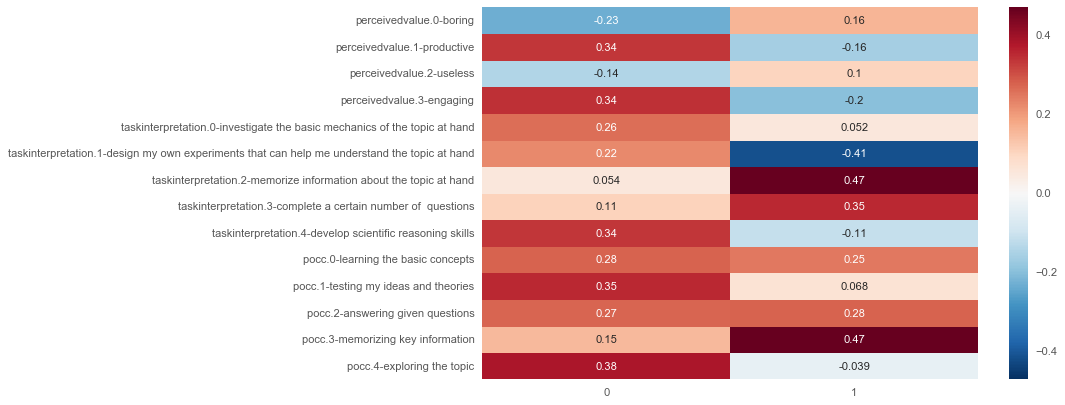

In [23]:
sns.heatmap(pca.components_.T,yticklabels=columns_for_pc,annot=True)

Looking at items that are part of the PC (by a factor of 0.3 percent). We can interpret the PC this way:

**PC 1** - Students think:
* the activity will be engaging, productive
* the activity is design to develop scientific reasoning skills
* they can do a good job of exploring the topic and testing their ideas.
"the engaged explorers"

**PC 2** - Students think:
* the activity is not designed to design their own experiments
* the activity is design to memorize information and complete a certain number of questions
* they can do a good job of memorizing key information
"the robots being tested"

Since the PCs are orthogonal, we have 4 types of students:
1. The engaged exploring robots (++)
2. The unrobotic engaged explorers (+-)
3. The unrobotic not engaged not exploring (--)
4. The not engaged not exploring robots (-+)

### What are the principle factors of task interpretation and perceived value? (PCA)

In [24]:
columns_for_pc = pv_columns + ti_columns
pca = decomposition.PCA(n_components=6)
pca.fit(data[columns_for_pc])
pca.explained_variance_ratio_.cumsum()

array([ 0.254,  0.413,  0.548,  0.67 ,  0.762,  0.841])

In [25]:
NC = 2
pca = decomposition.PCA(n_components=NC)
pca.fit(data[columns_for_pc])
X = pca.transform(data[columns_for_pc])
data['PC1'] = zip(*X)[0]
data['PC2'] = zip(*X)[1]

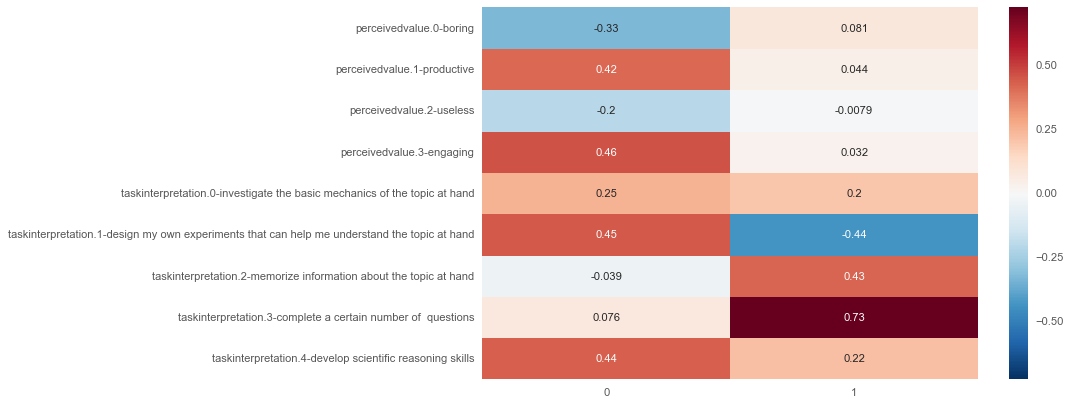

In [26]:
sns.heatmap(pca.components_.T,yticklabels=columns_for_pc,annot=True)

Looking at items that are part of the PC (by a factor of 0.3 percent). We can interpret the PC this way:

(low) **PC 1** - Students think:
* the activity will be engaging, productive
* the activity is design to develop scientific reasoning skills

(low) **PC 2** - Students think:
* the activity is not designed to design their own experiments
* the activity is designed to memorize information and complete a certain number of questions

### Investigating the two attitudinal groups in terms of overall POCC

In [27]:
# from sklearn.cluster import KMeans
# clusters = KMeans(n_clusters=2, n_init=10, verbose=0).fit(data[columns_for_pc])
# data['cluster_2_label'] = clusters.labels_

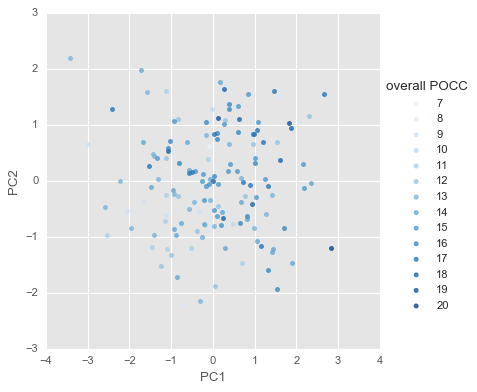

In [28]:
data['overall POCC'] = data[pocc_columns].sum(axis=1)
sns.lmplot(x='PC1', y='PC2',data=data,fit_reg=False,hue='overall POCC', palette="Blues")

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


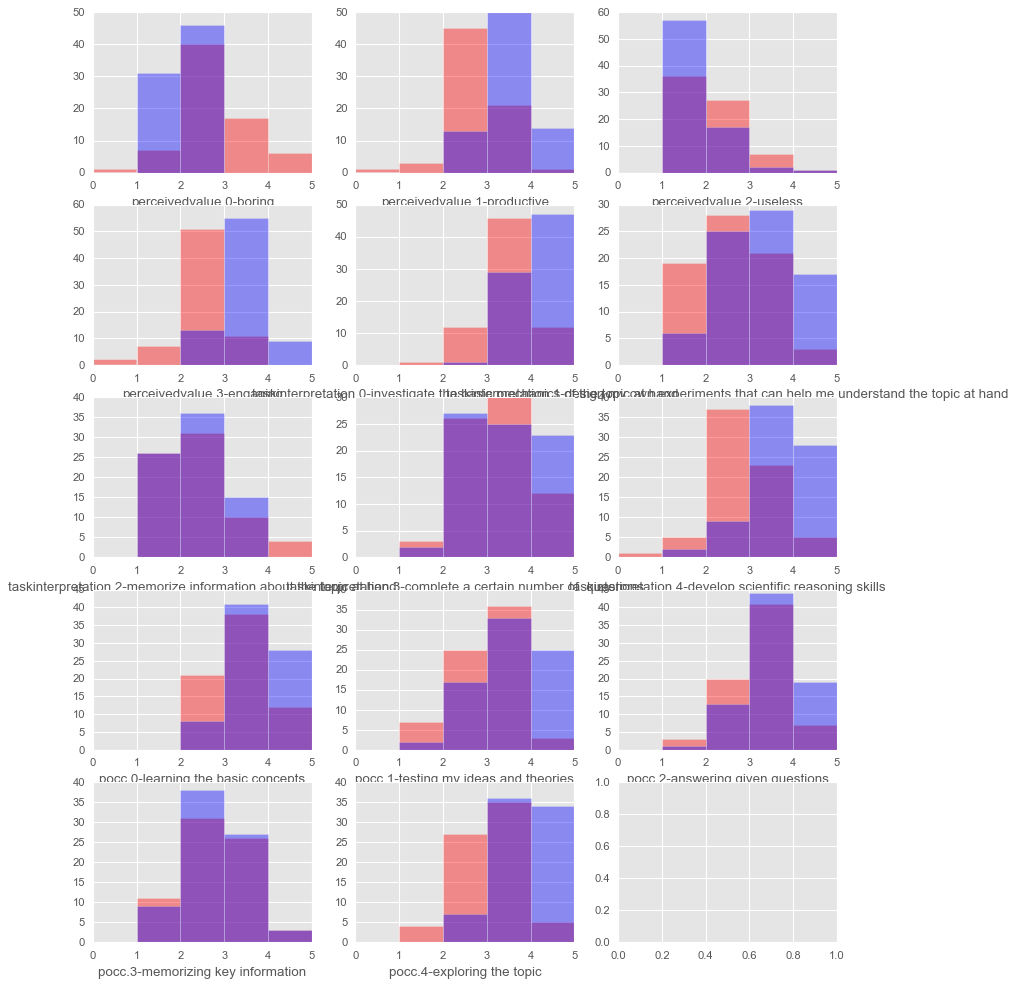

In [29]:
fig,axes = plt.subplots(nrows=len(att_columns)/3+1,ncols=3,figsize=(12,15))
for ax,col in zip(axes.reshape(-1),att_columns):
#     sns.distplot(data[data['cluster_2_label']==0][col],ax=ax,bins=[0,1,2,3,4,5],kde=False,label='0',color='red');
#     sns.distplot(data[data['cluster_2_label']==1][col],ax=ax,bins=[0,1,2,3,4,5],kde=False,label='1',color='blue');
    sns.distplot(data[data['PC1']<0][col],ax=ax,bins=[0,1,2,3,4,5],kde=False,label='low PC1',color='red');
    sns.distplot(data[data['PC1']>=0][col],ax=ax,bins=[0,1,2,3,4,5],kde=False,label='high PC1',color='blue');
plt.legend()

Clearly, the "red" students (low PC1) think:
* the activity will be productive and engaging
* the activity was design to develop scientific reasoning skills and test their ideas
* they can do a good job at the activity

Clearly, the "blue" students (high PC1) think:
* the activity will be boring, useless
* they tend to have a low perception of their control and competence

## Exporting the data

In [30]:
data.head()

,[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [High school level laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate physics laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [First year undergraduate chemistry laboratory],[prior_lab] What lab courses are you presently taking or have taken in the past? Check all that apply. [Higher level chemistry labs],similar_L,similar_C,same_L,same_C,prior_number_virtual_labs,perceivedvalue.0-boring,...,year-2nd year undergraduate,year-3rd year undergraduate,year-4th year undergraduate,sim,sim_index,perceivedvalue.0-boring_reversed,perceivedvalue.2-useless_reversed,PC1,PC2,overall POCC
0,1.0,1.0,1.0,0.0,0,0,0,0,2,3.0,...,0.0,0.0,0.0,C,2,1.0,3,-1.486,-0.107,14
1,1.0,1.0,0.0,0.0,0,0,0,0,0,2.0,...,0.0,0.0,0.0,L,2,2.0,3,2.315,1.158,12
2,0.0,1.0,1.0,0.0,0,0,0,0,1,1.0,...,1.0,0.0,0.0,C,2,3.0,3,-0.965,-0.167,14
3,1.0,1.0,1.0,0.0,0,1,0,0,3,2.0,...,0.0,0.0,0.0,L,2,2.0,3,1.205,0.694,17
4,0.0,1.0,0.0,0.0,1,0,0,0,2,2.0,...,0.0,0.0,0.0,C,2,2.0,3,1.007,0.404,15


In [31]:
export_data = data[['sid','overall POCC','PC1','PC2']].copy()
export_data.to_csv(os.path.join(BIG_FOLDER,'all_massaged_data\\incoming_attitudes.txt'), sep='\t', index=False)

## Incoming knowledge

In [32]:
# from scipy.stats import spearmanr
# correlation_matrix = np.zeros((len(know_columns),len(know_columns)))
# for i,c_i in enumerate(know_columns):
#     for j,c_j in enumerate(know_columns):
#         r,p = spearmanr(data[c_i],data[c_j])
#         correlation_matrix[i,j] = r
# #         if r>= 0.4 or r<=-0.4:
# #             print att_i,att_j,r,p

# np.fill_diagonal(correlation_matrix,0)
# # correlation_matrix[(correlation_matrix<0.4)&(correlation_matrix>-0.4)] = 0
# sns.heatmap(correlation_matrix,yticklabels=know_columns,xticklabels=know_columns,annot=True);

## All together

In [33]:
# data['incoming_knowledge_L'] = (data['Concentration']+data['Width']+data['Wavelength'])
# data['incoming_knowledge_C'] = (data['Area']+data['Separation']+data['Battery voltage'])
# data['incoming_knowledge_all'] = (data['Area']+data['Separation']+data['Battery voltage']+data['Concentration']+data['Width']+data['Wavelength'])

### Is incoming knowledge related to incoming attitude? (use PCA)

In [34]:
# columns_for_pc = att_columns + know_columns
# pca = decomposition.PCA(n_components=10)
# pca.fit(data[columns_for_pc])
# pca.explained_variance_ratio_.cumsum()

In [35]:
# NC = 5
# pca = decomposition.PCA(n_components=NC)
# pca.fit(data[columns_for_pc])
# X = pca.transform(data[columns_for_pc])
# # data['PC1'] = zip(*X)[0]
# # data['PC2'] = zip(*X)[1]

In [36]:
# sns.heatmap(pca.components_.T,yticklabels=columns_for_pc,annot=True)

# Picking out students

We want 8 students, 2 for each type:
* high attitude (cluster=0, PC1>2), high knowledge (incoming_knowledge_L ==8)
* high attitude (cluster=0, PC1>2), low knowledge (incoming_knowledge_L ==3)
* low attitude (cluster=1, PC1<-2), low knowledge (incoming_knowledge_L ==3)
* low attitude (cluster=1, PC1<-2), high knowledge (incoming_knowledge_L ==8)

On comment the following to save viz for 4 different types of students:

In [37]:
# print 'a',data[(data['PC1']>2)&(data['incoming_knowledge_L']>=6)]['sid']
# print 'b',data[(data['PC1']>2)&(data['incoming_knowledge_L']==2)]['sid']
# print 'c',data[(data['PC1']<-2)&(data['incoming_knowledge_L']==3)]['sid']
# print 'd',data[(data['PC1']<-2)&(data['incoming_knowledge_L']>=6)]['sid']

In [38]:
# columns = ['sid',"Concentration","Wavelength","Width","perceivedvalue.0-boring","perceivedvalue.1-productive","taskinterpretation.1-design my own experiments that can help me understand the topic at hand","pocc.4-exploring the topic"]
# exploration = data[data['sid'].isin([19989152,10537160,13654167,11929166])][columns]
# exploration['Fakename'] = ['Saturn','Tatouine','Ursula','Venus']
# exploration['knowledge'] = ['low','high','low','high']
# exploration['incoming_attitude'] = ['low','high','high','low']
# exploration.sort_values('Concentration',inplace=True)
# exploration

In [39]:
# %aimport utils_timeline_viz
# matplotlib.style.use('ggplot')
# matplotlib.rcParams['figure.figsize'] = 25, 15
# from matplotlib.backends.backend_pdf import PdfPages

# to_plot_beers = ['Pause','','Log axis','Inverse axis','Linear axis','Other axes','Abs vs. TrialNumber','Abs vs. Width','Abs vs. Concentration','','Graph edit axes','Graph add/del','Data Table delete','Record','','Wavelength','Width','Concentration','Detector','Laser toggle','','Absorbance']

# def save_multipage_viz(students_to_explore):
#     sim_name = {"beers":"Light absorbance",'capacitor':'Charge'}
#     with PdfPages('multipage_timeline_viz_{0}.pdf'.format('_'.join([str(n) for n in students_to_explore['sid']]))) as pdf:
#         for sim,to_plot in [('beers',to_plot_beers)]:#,('capacitor',to_plot_caps)]:
#             for i,row in students_to_explore.iterrows():
#                 studentid = row['sid']
#                 name = row['Fakename']
#                 att = row['incoming_attitude']+' attitude'
#                 know = row['incoming_knowledge']+' knowledge'
#                 filename = find_student_log_file(sim,studentid)
#                 date = date = re.search(r'\d{7,8}_([\d\-\.\_]+)\.txt', filename).group(1)
#                 df = prep_parsing_data(filename)
#                 plt.figure(figsize=(20,12))
#                 plt.title("{1} \t {0} \t {2} \t {3}".format(name,sim_name[sim],att,know),fontsize=25)
#                 plot(df,to_plot,family_name_to_code,function_to_use,colors)
# #                 plt.show()
#                 plt.tight_layout()
#                 pdf.savefig()
#                 plt.close()

# save_multipage_viz(exploration)